In [1]:
import os
import re
import json
from matplotlib.cm import viridis, seismic, coolwarm, Spectral, magma
import matplotlib.pyplot as plt
from collections import defaultdict
import jax.numpy as jnp
import jax
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
from grad_sample.utils.tree_op import shape_tree

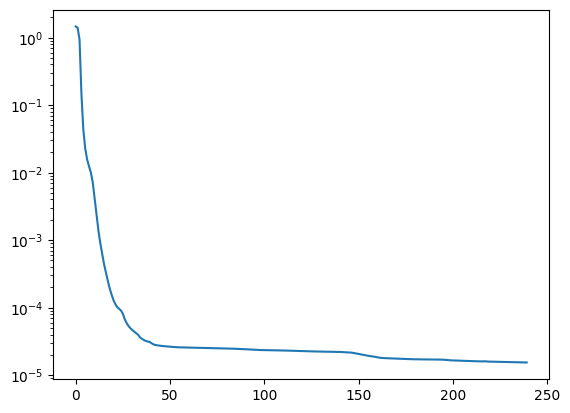

In [3]:
fs_path = '/home/amisery/scratch_link/grad_sample_fullsum/xxz_1.5/L16/RBM/alpha3/0.0022_1e-06/run_1.log'
fs_file = json.load(open(fs_path))
plt.plot(fs_file['rel_err']['value'])
plt.yscale('log')

In [43]:
def op_snr(tree, func):
    leaves = jax.tree_util.tree_leaves(tree)
    return func(jnp.stack([func(leaf, axis=range(1, leaf.ndim)) for leaf in leaves]), axis=0)

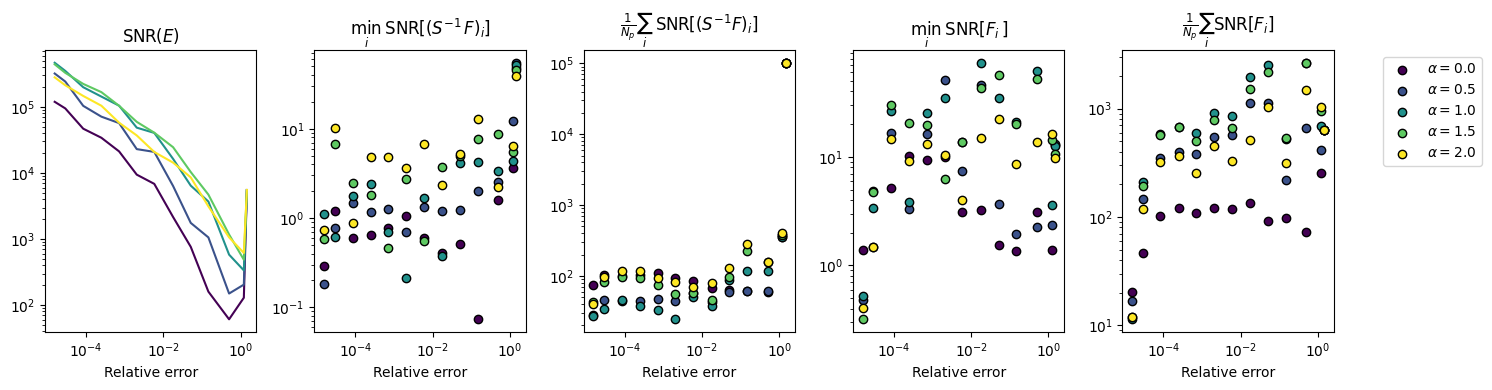

In [46]:
import numpy as np
alpha_l = [0.0, 0.5, 1.0, 1.5, 2.0]
diag_shift = 1e-6
colors = viridis(jnp.linspace(0, 1,len(alpha_l)))
fig, axes = plt.subplots(1,5, figsize=(15,4))

for idx, alpha in enumerate(alpha_l):
    data = np.load(f'/home/amisery/scratch_link/grad_sample_fullsum/xxz_1.5/L16/RBM/alpha3/0.0022_1e-06/run_1/out_analysis_{alpha}_{diag_shift}.npz', allow_pickle=True)['arr_0'].item()
    rel_err = data['rel_err']
    snr_ng = data['snr_ng'][0]
    snr_grad = data['snr_grad']
    snr_e = data['snr_e']
    
    for ax in axes.flat:
        ax.set_xlabel('Relative error')
        ax.set_xscale('log')
        ax.set_yscale('log')

    axes[0].plot(rel_err, snr_e, color = colors[idx], label = alpha)
    axes[0].set_title(r'$\mathrm{SNR}(E)$')

    axes[1].scatter(rel_err, op_snr(snr_ng, jnp.min), color = colors[idx], label = alpha, edgecolors='black')
    axes[1].set_title(r'$\min_i \: \mathrm{SNR}[(S^{-1}F)_i]$')

    axes[2].scatter(rel_err, op_snr(snr_ng, jnp.mean), color = colors[idx], label = alpha, edgecolors='black')
    axes[2].set_title(r'$\frac{1}{N_p}\sum_i \: \mathrm{SNR}[(S^{-1}F)_i]$')

    axes[3].scatter(rel_err, op_snr(snr_grad, jnp.min), color = colors[idx], label = alpha, edgecolors='black')
    axes[3].set_title(r'$\min_i \: \mathrm{SNR}[F_i]$')

    axes[4].scatter(rel_err,  op_snr(snr_grad, jnp.mean), color = colors[idx], label = r"$\alpha = %.1f$"%alpha, edgecolors='black')
    axes[4].set_title(r'$\frac{1}{N_p}\sum_i \mathrm{SNR}[F_i]$')

plt.legend(bbox_to_anchor=(1.2,1))
fig.tight_layout()


In [45]:
import jax
import jax.numpy as jnp



# Example usage
pytree = {
    'a': jnp.ones((5, 2, 3)),  # Shape (5, 2, 3)
    'b': jnp.ones((5, 4)),     # Shape (5, 4)
    'c': [jnp.ones((5, 6))],   # Nested list with shape (5, 6)
}

flattened_array = flatten_tree_to_array(pytree)
print(flattened_array.shape)  # Output: (5, 2*3 + 4 + 6 = 16)

(5, 16)


In [6]:
print(shape_tree(data['snr_ng']))

({'Dense': {'bias': (53, 48), 'kernel': (53, 16, 48)}, 'visible_bias': (53, 16)}, None)


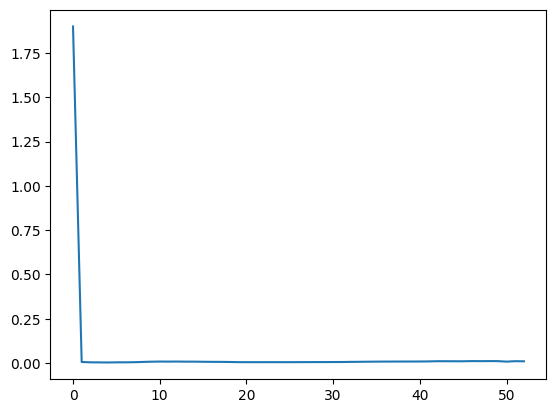

In [7]:
plt.plot(op_snr(data['snr_ng'][0], jnp.mean))

In [8]:
import jax
import jax.numpy as jnp

def stack_pytrees(pytrees, axis=0):
    """
    Stacks a list of pytrees along the specified axis.

    Parameters:
    - pytrees: List of pytrees to stack.
    - axis: Axis along which to stack the arrays in the pytrees.

    Returns:
    - A single pytree with arrays stacked along the specified axis.
    """
    return jax.tree_util.tree_map(lambda *arrays: jnp.stack(arrays, axis=axis), *pytrees)

# Example usage
pytree1 = {'a': jnp.array([1, 2]), 'b': jnp.array([3])}
pytree2 = {'a': jnp.array([4, 5]), 'b': jnp.array([6])}
pytree3 = {'a': jnp.array([7, 8]), 'b': jnp.array([9])}

pytrees = [pytree1, pytree2, pytree3]

# Stack the list of pytrees
stacked_pytree = stack_pytrees(pytrees)

print(stacked_pytree)

{'a': Array([[1, 2],
       [4, 5],
       [7, 8]], dtype=int32), 'b': Array([[3],
       [6],
       [9]], dtype=int32)}
